In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)

<Figure size 600x300 with 0 Axes>

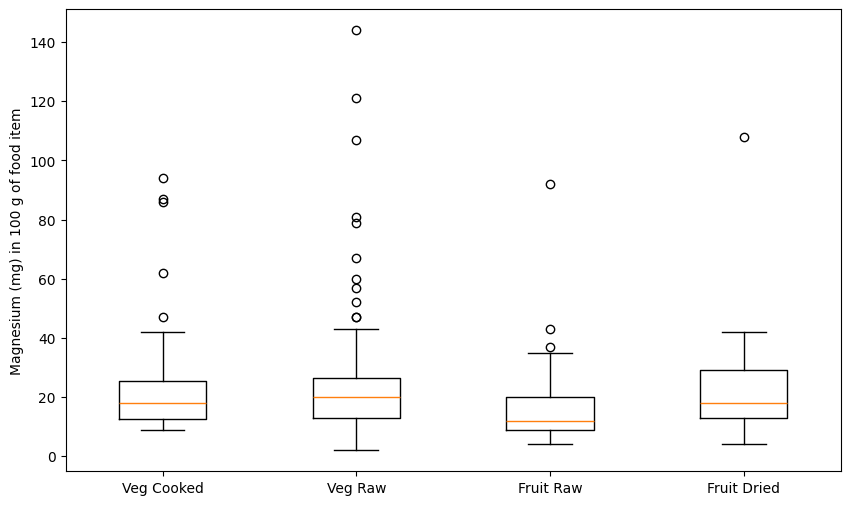

In [3]:
# Let's see how magnesium distributes between fruits and vegetables in 100 g.

data = [df_v_vc['mg_in_mg'], df_v_vr['mg_in_mg'], df_v_fr['mg_in_mg'], df_v_fd['mg_in_mg']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Cooked', 'Veg Raw', 'Fruit Raw', 'Fruit Dried']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Magnesium (mg) in 100 g of food item')

# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

In [4]:
# top raw vegetables in magnesium content in 100g:

top = df_v_vr[['long_desc', 'mg_in_mg']].sort_values(by="mg_in_mg",ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                    long_desc  mg_in_mg
54                    Seaweed, irishmoss, raw     144.0
55                         Seaweed, kelp, raw     121.0
76                       Seaweed, wakame, raw     107.0
19                          Chard, swiss, raw      81.0
57                               Spinach, raw      79.0
53                         Seaweed, agar, raw      67.0
1          Artichokes, (globe or french), raw      60.0
40                                  Okra, raw      57.0
86                               Nopales, raw      52.0
85                               Arugula, raw      47.0
32                                  Kale, raw      47.0
30                           Ginger root, raw      43.0
21                                Chives, raw      42.0
8                           Burdock root, raw      38.0
24                         Cress, garden, raw      38.0
81                    Corn, sweet, white, raw      37.0
23                   Corn, sweet, yellow, raw   

In [5]:
# top raw vegetables in magnesium content in 100 kcal:

top = df_v_fr[['long_desc', 'mg_mg_in_100kcal']].sort_values(by='mg_mg_in_100kcal',ascending=False)
top_30_values = top.head(30)
print(top_30_values)

                                   long_desc  mg_mg_in_100kcal
47                              Rhubarb, raw         57.142857
35                              Papayas, raw         48.837209
5                          Blackberries, raw         46.511628
46                          Raspberries, raw         42.307692
31                           Mulberries, raw         41.860465
49                         Strawberries, raw         40.625000
29                       Melons, casaba, raw         39.285714
50                            Tamarinds, raw         38.493724
28                   Melons, cantaloupe, raw         35.294118
51                           Watermelon, raw         33.333333
21                       Guavas, common, raw         32.352941
8                Carambola, (starfruit), raw         32.258065
48                              Soursop, raw         31.818182
22                            Jackfruit, raw         30.526316
4                               Bananas, raw         30

<Figure size 600x300 with 0 Axes>

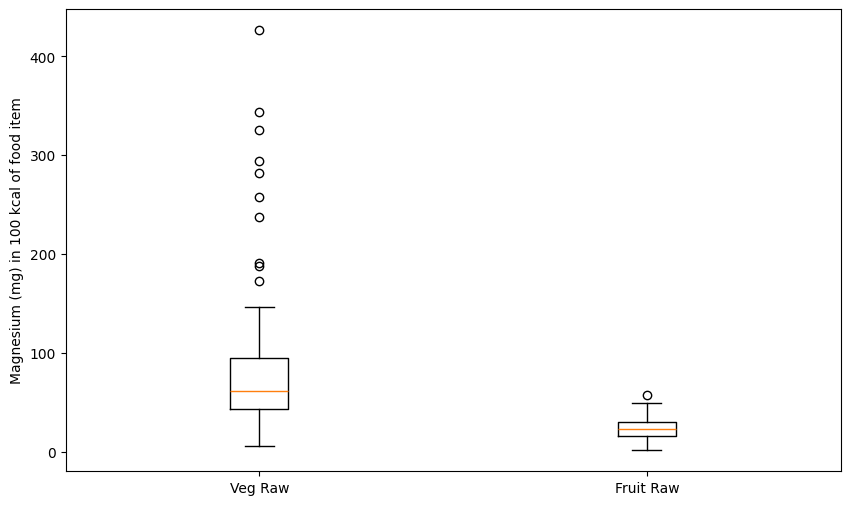

In [6]:
# Let's see how magnesium content distributes between 100kcal of products:

data = [df_v_vr['mg_mg_in_100kcal'], df_v_fr['mg_mg_in_100kcal']]
 
fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Veg Raw', 'Fruit Raw']
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylabel('Magnesium (mg) in 100 kcal of food item')
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()